# Importing Modules and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df = df.rename(columns={'CRIM':'CRIME', 'DIS':'DISTANCE', 'B':'BLACKS', 'MEDV':'PRICE'})

# Visualising

Text(0.5, 1.0, 'AGE vs PRICE')

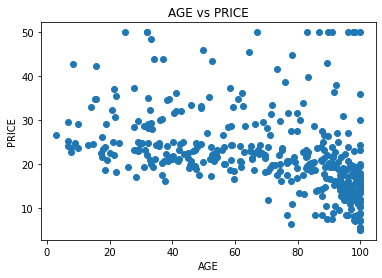

In [10]:
plt.scatter(df['AGE'], df['PRICE'])
plt.xlabel('AGE')
plt.ylabel('PRICE')
plt.title('AGE vs PRICE')

Text(0.5, 1.0, 'CRIME vs PRICE')

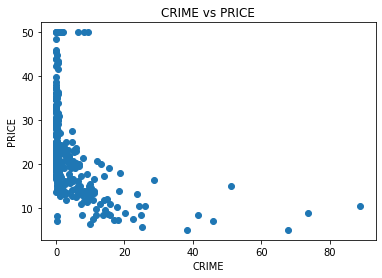

In [11]:
plt.scatter(df['CRIME'], df['PRICE'])
plt.xlabel('CRIME')
plt.ylabel('PRICE')
plt.title('CRIME vs PRICE')

In [12]:
df.columns

Index(['CRIME', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DISTANCE', 'RAD',
       'TAX', 'PTRATIO', 'BLACKS', 'LSTAT', 'PRICE'],
      dtype='object')

Text(0.5, 1.0, 'DISTANCE vs PRICE')

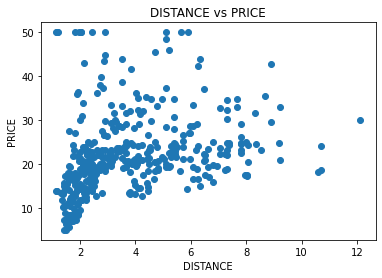

In [13]:
plt.scatter(df['DISTANCE'], df['PRICE'])
plt.xlabel('DISTANCE')
plt.ylabel('PRICE')
plt.title('DISTANCE vs PRICE')

Text(0.5, 1.0, 'TAX vs PRICE')

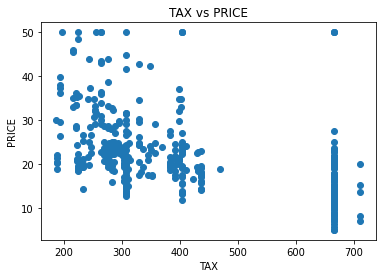

In [14]:
plt.scatter(df['TAX'], df['PRICE'])
plt.xlabel('TAX')
plt.ylabel('PRICE')
plt.title('TAX vs PRICE')

Text(0.5, 1.0, 'LSTAT vs PRICE')

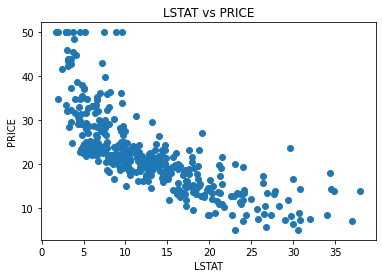

In [15]:
plt.scatter(df['LSTAT'], df['PRICE'])
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('LSTAT vs PRICE')

# Observations

* We can see that the older the house is th lower the price gets.
* We can see that the lower the crime rate is the higher thr price is.
* We can see that most peope have bought the houses which are near the highways.
* We can also see that most people have bought the houses with lesser tax.

# Splitting Dataset

In [18]:
X = df[['CRIME', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DISTANCE', 'RAD',
       'TAX', 'PTRATIO', 'BLACKS', 'LSTAT']]
y = df['PRICE']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Creating the Linear Regression Model and Fitting the Data**

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X.isnull().sum()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print(model.intercept_)

26.643103405316115


In [22]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIME,-0.071668
ZN,0.040781
INDUS,0.065085
CHAS,2.711994
NOX,-19.794461
RM,5.253264
AGE,-0.024198
DISTANCE,-1.470089
RAD,0.241940
TAX,-0.013832


# **Predicting the Data**

In [23]:
predictions = model.predict(X_test)

# **Plotting the Graph**

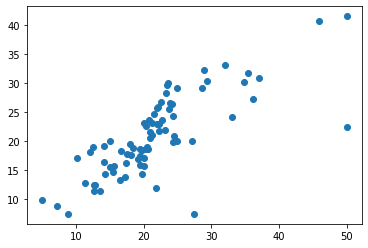

In [24]:
plt.scatter(y_test, predictions)

In [25]:
from sklearn import metrics

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.r2_score(y_test, predictions))

Mean Absolute Error: 3.4843562556302334
Mean Squared Error: 28.849872777166887
Root Mean Squared Error: 5.371207757773561
R^2: 0.5806563123015831


# KNN

In [34]:

import matplotlib.pyplot as plt  
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
boston=datasets.load_boston()
x=boston.data[:,:]
y=boston.target
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

(506, 13) (506,)


In [35]:
def dis(v,w):
    return np.sqrt(np.sum((v-w)**2))
def knn_r(tr, tr_lab, te , k):
    distances = []
    
    for i in range(tr.shape[0]):
        distances.append(dis(tr[i], te))
    
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_lab_2 = tr_lab[inds]
    value = np.average(tr_lab_2[:k])
    
    return value

In [37]:
def knn_reg(tr , tr_lab, te , te_lab , k):
    preds = []
    for i in range(te.shape[0]):
        value = knn_r(tr, tr_lab, te[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(te_lab , preds)
    return err
acc = knn_reg(xtrain , ytrain , xtest , ytest ,5)
print ("MEAN SQUARED ERROR:",acc)

MEAN SQUARED ERROR: 25.860125490196076
